<a href="https://colab.research.google.com/github/Ahmed-Shatla/classify-sentiment-of-the-1.6-M-tweets-using-LSTM-Negative-Positive-/blob/main/LSTM_12th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


In [3]:
data = pd.read_csv('/content/drive/MyDrive/12th deep learning/training.csv',encoding="ISO-8859-1",names=['Target','ID','Date','Query_flag','User','Tweet_text'])
data.head()

,Target,ID,Date,Query_flag,User,Tweet_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
data['Target'].unique()

array([0, 4])

In [5]:
data.shape

(1600000, 6)

In [6]:
data.dtypes

Target         int64
ID             int64
Date          object
Query_flag    object
User          object
Tweet_text    object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


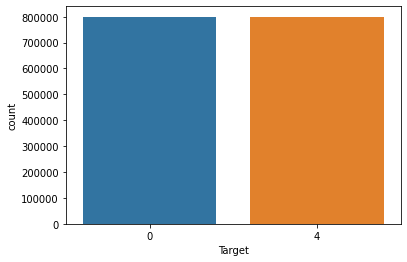

In [7]:
sns.countplot(data['Target'])

In [8]:
data.isna().sum()

Target        0
ID            0
Date          0
Query_flag    0
User          0
Tweet_text    0
dtype: int64

In [9]:
tweets=np.array(data['Tweet_text'])

In [10]:
tweets[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [11]:
import re
def clean_text(text):
  text = re.sub(r'#\w*','',text) #removing hashtags
  text = re.sub(r'@\w*','',text) #removing minshions
  text = re.sub(r'https?:\S*','',text) #removing http/s links
  text = re.sub(r'\d*','',text) #removing numbers
  text = re.sub(r'\W+',' ',text) #removing non words like (- , :)
  text = re.sub(r'_','',text) #removing underscore symbol
  text = re.sub(r'\s\S$','',text) #removing single characters at the end of the sentenses
  text = re.sub(r'^\s','',text) #removing spaces at the begain of the sentences
  text = re.sub(r'\s$','',text) #removing spaces at the end of the sentences


  return text

In [12]:
clean_tweets = []
for tweet in tweets:
  clean_tweets.append(clean_text(tweet))
clean_tweets[0]

'Awww that s a bummer You shoulda got David Carr of Third Day to do it'

In [13]:
splitted_tweets = []
for tweet in clean_tweets:
  splitted_tweets.append(tweet.split())
splitted_tweets[0]

['Awww',
 'that',
 's',
 'a',
 'bummer',
 'You',
 'shoulda',
 'got',
 'David',
 'Carr',
 'of',
 'Third',
 'Day',
 'to',
 'do',
 'it']

#Downloading stop_words

In [14]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
#example
stop_words[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
def remove_stopwords(words): 
  WORDS = []
  for word in words:
    if word.lower() not in stop_words and len(word)!=1:   ##check if the word is stop or not with making sure its small word 
      WORDS.append(word)
  return WORDS

In [16]:
cleaned_tweets = []
for tweet in splitted_tweets:
  cleaned_tweets.append(remove_stopwords(tweet))

In [17]:
cleaned_tweets[:5]

[['Awww', 'bummer', 'shoulda', 'got', 'David', 'Carr', 'Third', 'Day'],
 ['upset',
  'update',
  'Facebook',
  'texting',
  'might',
  'cry',
  'result',
  'School',
  'today',
  'also',
  'Blah'],
 ['dived', 'many', 'times', 'ball', 'Managed', 'save', 'rest', 'go', 'bounds'],
 ['whole', 'body', 'feels', 'itchy', 'like', 'fire'],
 ['behaving', 'mad', 'see']]

In [18]:
cleaned_tweets[0][0]

'Awww'

In [19]:
#all lower
for tweet in range(len(cleaned_tweets)):
  for i in range(len(cleaned_tweets[tweet])):
    cleaned_tweets[tweet][i] = cleaned_tweets[tweet][i].lower()

In [20]:
cleaned_tweets[0]

['awww', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']

In [21]:
from nltk.stem.snowball import SnowballStemmer

In [22]:
#stemming
snow_stemmer = SnowballStemmer(language='english')
for i in range(len(cleaned_tweets)):
  for j in range(len(cleaned_tweets[i])):
    cleaned_tweets[i][j] = snow_stemmer.stem(cleaned_tweets[i][j])

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [24]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_tweets)
tweets_squenced=tokenizer.texts_to_sequences(cleaned_tweets)

In [25]:
tweets_squenced[:5]

[[351, 1010, 2973, 11, 687, 7237, 1624, 3],
 [576, 215, 419, 345, 199, 229, 946, 74, 9, 184, 962],
 [3515, 221, 10, 806, 683, 495, 337, 1, 2630],
 [329, 627, 20, 2442, 6, 837],
 [3881, 444, 19]]

In [26]:
pad_seq_tweets=pad_sequences(tweets_squenced)
pad_seq_tweets[:2]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  351, 1010,
        2973,   11,  687, 7237, 1624,    3],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  576,  215,  419,  345,  199,
         229,  946,   74,    9,  184,  962]], dtype=int32)

In [27]:
target = data['Target']
target = data['Target'].replace(4,1)

In [28]:
target.unique()

array([0, 1])

In [29]:
#vocab size
vocab_size = len(tokenizer.word_index)
vocab_size

220989

In [30]:
from sklearn.model_selection import train_test_split
trainX,testX,trainy,testy=train_test_split(pad_seq_tweets,target,test_size=0.1)


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional

In [34]:
model = Sequential()
model.add(Embedding(vocab_size+1,15,input_length=50))

model.add(Bidirectional(LSTM(units=64)))


model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='RMSprop',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 15)            3314850   
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              40960     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 3,355,939
Trainable params: 3,355,939
Non-trainable params: 0
_________________________________________________________________


In [35]:
import time
start = time.time()
history = model.fit(trainX,trainy,validation_split=0.1,batch_size=1024,verbose=1,epochs=5)
end = time.time()

Epoch 1/5
1266/1266 [==============================] - 798s 627ms/step - loss: 0.4937 - accuracy: 0.7605 - val_loss: 0.4685 - val_accuracy: 0.7751
Epoch 2/5
1266/1266 [==============================] - 782s 617ms/step - loss: 0.4595 - accuracy: 0.7818 - val_loss: 0.4618 - val_accuracy: 0.7787
Epoch 3/5
1266/1266 [==============================] - 782s 618ms/step - loss: 0.4497 - accuracy: 0.7877 - val_loss: 0.4569 - val_accuracy: 0.7820
Epoch 4/5
1266/1266 [==============================] - 780s 616ms/step - loss: 0.4426 - accuracy: 0.7923 - val_loss: 0.4547 - val_accuracy: 0.7832
Epoch 5/5
1266/1266 [==============================] - 776s 613ms/step - loss: 0.4367 - accuracy: 0.7963 - val_loss: 0.4559 - val_accuracy: 0.7824


In [38]:
training_time = (end-start)/60
print(str(training_time)+" Min")

65.4323054711024 Min


In [39]:
predictions = model.predict(testX)

In [40]:
predictions

array([[0.7283437 ],
       [0.45970613],
       [0.17865911],
       ...,
       [0.621571  ],
       [0.24530631],
       [0.10751921]], dtype=float32)

In [41]:
Output = []
for pred in predictions:
  if pred >= 0.5:
    Output.append(1)
  else:
    Output.append(0)

In [42]:
 from sklearn.metrics import accuracy_score
 accuracy_score(testy,Output)

0.78455

Text(0.5, 0, 'epochs')

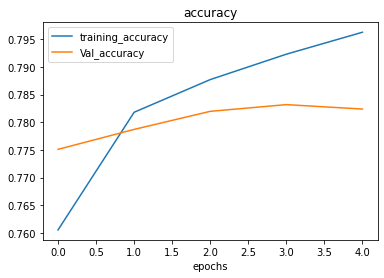

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

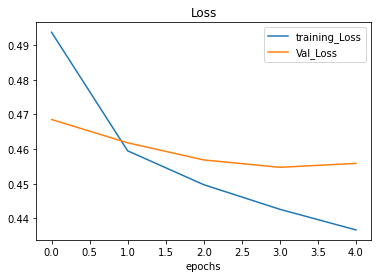

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')